In [1]:
from tensorflow import keras

In [2]:
### 데이터 읽어 들이기
(train_input, train_target), (test_input, test_target) = \
     keras.datasets.fashion_mnist.load_data()
    
print(train_input.shape, train_target.shape)    
print(test_input.shape, test_target.shape)

### 정규화 하기
train_scaled = train_input / 255.0
print(train_scaled.shape)

### 훈련 및 검증데이터로 분류하기
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = \
         train_test_split(train_scaled, train_target,
                          test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28)
(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [4]:
### 모델 및 계층 생성하기는 함수 만들어서 사용
def model_fn(a_layer=None) : 
    ### 모델 생성
    model = keras.Sequential()
    
    ### 전처리계층 추가
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    
    ### 은닉층 추가
    model.add(keras.layers.Dense(100, activation="relu"))
    
    ### 추가할 계층이 있는 경우 아래 적용됨
    # - 성능항샹을 위해 추가할 계층이 있는 경우 사용
    if a_layer : 
        model.add(a_layer)        
    
    ### 출력층 추가
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    ### 모델 반환하기
    return model

### epoch 5로 모델 훈련시키기

In [5]:
model5 = model_fn()
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
### compile 하기
model5.compile(loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [7]:
history5 = model5.fit(train_scaled, train_target, epochs=5)
history5

Epoch 1/5
1500/1500 [==============================] - 1s 544us/step - loss: 0.5342 - accuracy: 0.8119
Epoch 2/5
1500/1500 [==============================] - 1s 528us/step - loss: 0.3906 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 1s 533us/step - loss: 0.3536 - accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 1s 531us/step - loss: 0.3353 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 1s 529us/step - loss: 0.3206 - accuracy: 0.8849


In [8]:
### 훈련반복횟수
print(history5.epoch)

### 훈련 결과 전체
print(history5.history)

### 훈련 결과 딕셔너리
print(history5.history.keys())

[0, 1, 2, 3, 4]
{'loss': [0.5341569185256958, 0.3906327188014984, 0.35363712906837463, 0.33526715636253357, 0.32062116265296936], 'accuracy': [0.8119375109672546, 0.8588333129882812, 0.8733958601951599, 0.8807916641235352, 0.8848541378974915]}
dict_keys(['loss', 'accuracy'])


In [9]:
### 훈련 및 검증 결과 동시에 추출하기
# - verbose : 출력 옵션(1은 손실과 정확도 모두 보여주기,
#                       0은 출력결과 안보여주기)
# - validation_data : 검증결과까지 모두 확인하고자 할때 사용하는 속성 
history5 = model5.fit(train_scaled, train_target,
                      epochs=5, verbose=1,
                      validation_data=(val_scaled, val_target))

Epoch 1/5
1500/1500 [==============================] - 1s 665us/step - loss: 0.3080 - accuracy: 0.8908 - val_loss: 0.3685 - val_accuracy: 0.8789
Epoch 2/5
1500/1500 [==============================] - 1s 641us/step - loss: 0.2982 - accuracy: 0.8941 - val_loss: 0.3688 - val_accuracy: 0.8773
Epoch 3/5
1500/1500 [==============================] - 1s 628us/step - loss: 0.2912 - accuracy: 0.8957 - val_loss: 0.4356 - val_accuracy: 0.8662
Epoch 4/5
1500/1500 [==============================] - 1s 617us/step - loss: 0.2852 - accuracy: 0.8996 - val_loss: 0.3948 - val_accuracy: 0.8764
Epoch 5/5
1500/1500 [==============================] - 1s 618us/step - loss: 0.2750 - accuracy: 0.9040 - val_loss: 0.3970 - val_accuracy: 0.8802


In [12]:
history5.history
history5.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

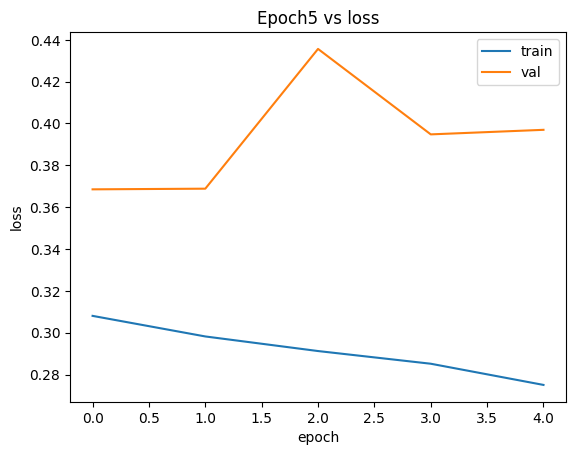

In [14]:
import matplotlib.pyplot as plt

### 훈련 및 검증 손실곡선 그리기
plt.plot(history5.history["loss"])
plt.plot(history5.history["val_loss"])

plt.title("Epoch5 vs loss")

plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend(["train", "val"])
plt.show()

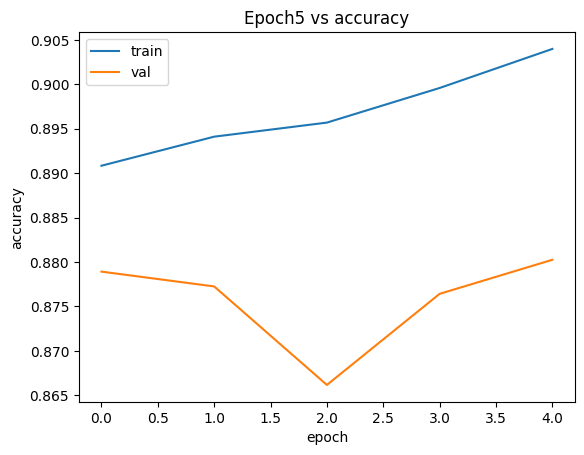

In [15]:
import matplotlib.pyplot as plt

### 훈련 및 검증 정확도곡선 그리기
plt.plot(history5.history["accuracy"])
plt.plot(history5.history["val_accuracy"])

plt.title("Epoch5 vs accuracy")

plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend(["train", "val"])
plt.show()